In [18]:
DCS_url = "./h1b.csv"
import pandas as pd
DCS_df = pd.read_csv(DCS_url,index_col=0, parse_dates=True)
DCS_df.head(20)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
6,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
7,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.0,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
8,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.0,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
9,CERTIFIED-WITHDRAWN,ESI COMPANIES INC.,CHIEF EXECUTIVES,PRESIDENT,Y,127546.0,2016.0,"MEMPHIS, TEXAS",NaN,NaN
10,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.0,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222


In [5]:
DCS_df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [7]:
DCS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                float64
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [8]:
total = DCS_df.isnull().sum().sort_values(ascending=False)

percent_1 = DCS_df.isnull().sum()/DCS_df.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
lat,107242,3.6
lon,107242,3.6
SOC_NAME,17734,0.6
PREVAILING_WAGE,85,0.0
EMPLOYER_NAME,59,0.0
JOB_TITLE,43,0.0
FULL_TIME_POSITION,15,0.0
YEAR,13,0.0
CASE_STATUS,13,0.0
WORKSITE,0,0.0


In [17]:
DCS_df.isnull().sum()

CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [19]:
DCS1 = DCS_df.dropna(axis=0, subset=['SOC_NAME','lon','lat'])

In [21]:
DCS1.isnull().sum()

CASE_STATUS            0
EMPLOYER_NAME         32
SOC_NAME               0
JOB_TITLE             13
FULL_TIME_POSITION     1
PREVAILING_WAGE       56
YEAR                   0
WORKSITE               0
lon                    0
lat                    0
dtype: int64

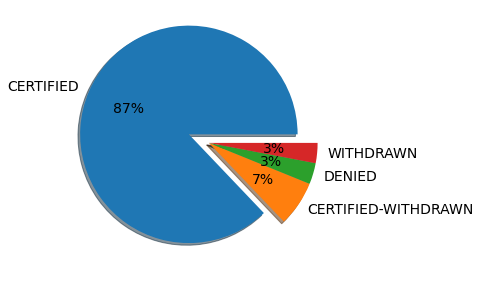

In [9]:
import matplotlib.pyplot as plt
status = DCS_df['CASE_STATUS'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(labels=status.index[:-3], x=status[:-3], explode=[0.2,0,0,0], autopct='%.f%%', shadow=True, textprops={'fontsize':14})
plt.show()